EDA AND DATA STORY

Performed some analysis to get the records of those WHO HAVE A HIGHEST CHANCE of getting admitted and LOWEST CHANCE of getting admitted to do Masters Program 

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('E:/Data Science/14872_228180_bundle_archive_capstone1/Admission_Predict_Ver1.1.csv')

In [226]:
#renamed inconsistent columns
df.shape
df.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)
df.rename(columns = {'LOR ':'LOR'}, inplace = True)
df.columns
df_cleaned = df


In [227]:
#Can you count something interesting?
# Getting max values for each column
df_cleaned.max(axis = 0)

Serial No.           500.00
GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    5.00
LOR                    5.00
CGPA                   9.92
Research               1.00
Chance of Admit        0.97
dtype: float64

In [228]:
#Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
df_cleaned.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [229]:
#Printing dataset by sorting GRE Score in descending order
data_sorted = df_cleaned.sort_values('GRE Score', ascending=False)
print(data_sorted)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
429         430        340          115                  5  5.0  4.5  9.06   
84           85        340          115                  5  4.5  4.5  9.45   
81           82        340          120                  4  5.0  5.0  9.50   
143         144        340          120                  4  4.5  4.0  9.92   
202         203        340          120                  5  4.5  4.5  9.91   
..          ...        ...          ...                ...  ...  ...   ...   
272         273        294           95                  1  1.5  1.5  7.64   
79           80        294           93                  1  1.5  2.0  7.36   
168         169        293           97                  2  2.0  4.0  7.80   
377         378        290          100                  1  1.5  2.0  7.56   
117         118        290          104                  4  2.0  2.5  7.46   

     Research  Chance of Admit  
429         1             0.95

In [230]:
#group by GRE Score and Chance of Admit
df_sorted.groupby("GRE Score")['Chance of Admit'].mean()

GRE Score
290    0.460000
293    0.640000
294    0.475000
295    0.512000
296    0.522000
297    0.498333
298    0.507000
299    0.537000
300    0.595833
301    0.624545
302    0.558571
303    0.590000
304    0.570833
305    0.624545
306    0.642857
307    0.627000
308    0.655385
309    0.637778
310    0.667273
311    0.665000
312    0.685417
313    0.684167
314    0.696250
315    0.645385
316    0.661667
317    0.690000
318    0.702500
319    0.729167
320    0.790000
321    0.805294
322    0.784706
323    0.785385
324    0.813913
325    0.742667
326    0.822500
327    0.801176
328    0.848889
329    0.853000
330    0.906250
331    0.918889
332    0.893750
333    0.930000
334    0.916250
335    0.940000
336    0.948000
337    0.940000
338    0.920000
339    0.936667
340    0.947778
Name: Chance of Admit, dtype: float64

Text(0.5, 0, 'Chance of Admit')

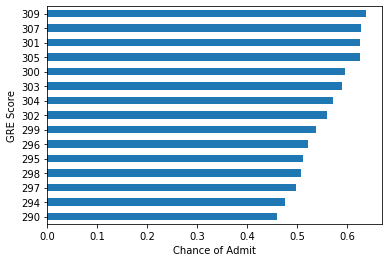

In [231]:
#Can you make a bar plot or a histogram?
x = df.groupby("GRE Score")['Chance of Admit'].mean().sort_values().head(15)
x.plot(kind= 'barh')
plt.xlabel('Chance of Admit') 


Text(0, 0.5, 'Chance of Admit')

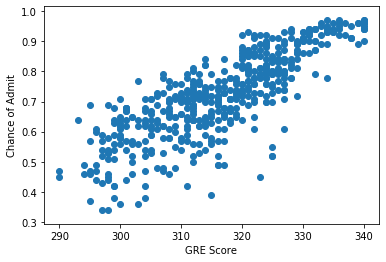

In [232]:
#Can you compare two related quantities?
#Can you make a scatterplot?
df_cleaned[['GRE Score', 'Chance of Admit']]
plt.scatter(df_cleaned[['GRE Score']], df_cleaned[['Chance of Admit']])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')


In [233]:
#There ia a direct relation between 'GRE Score' and 'Chance of Admit'

Text(0.5, 0, 'Chance of Admit')

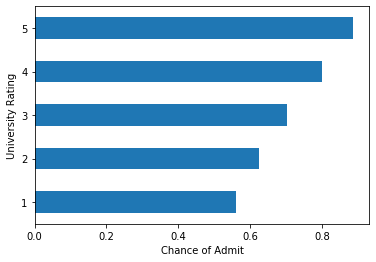

In [234]:
x = df.groupby("University Rating")['Chance of Admit'].mean().sort_values().head(15)
x.plot(kind= 'barh')
plt.xlabel('Chance of Admit') 

In [207]:
#From the plots we can say that there ia a direct relation between 'GRE Score' and 'Chance of Admit'
# Also the same linear relation between 'University Rating' and 'Chance of Admit'

In [235]:
#Who has the highest chance of admission and lowest chance of admission
max_COA = max(df_cleaned['Chance of Admit'])
min_COA = min(df_cleaned['Chance of Admit'])

In [236]:
print(max_COA)
print(min_COA)

0.97
0.34


In [237]:
# Displaying those students records who has highest chance of getting admission and lowest chance of getting admission
values = ['0.97', '0.34']
df_cleaned[df_cleaned['Chance of Admit'].isin(values)]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
24,25,336,119,5,4.0,3.5,9.80,1,0.97
92,93,298,98,2,4.0,3.0,8.03,0,0.34
143,144,340,120,4,4.5,4.0,9.92,1,0.97
202,203,340,120,5,4.5,4.5,9.91,1,0.97
203,204,334,120,5,4.0,5.0,9.87,1,0.97
376,377,297,96,2,2.5,2.0,7.43,0,0.34


Data Story & Conclusion:

   I have taken the data and then did some cleaning on it. Like I observed for missing values, inconsistent column names, and for any outliers from the data set named 'df' .Then I named the cleaned dataset as df_cleaned. 
Later I have done with the Exploratory Data Anlalysis along with some visualization to check the relation between all the fileds with the "Chance of Admit" column to predict some facts if anything.
 ""Vizualizations are GOOD ENOUGH to confirm that the relation with all the fields with "Chance of Admit" is linear or directly 
proportional. 
 Finally I have come up with those records that who has highest chance of admission and have lowest chance of admission